In [7]:
pip install pandas


In [17]:
import pandas as pd
df = pd.read_csv('internet_session.csv')

display(df)

name           start_time   usage_time            IP  \
0     user1  2022-05-10 02:59:32  00:00:36:28  10.55.14.222   
1     user1  2022-05-10 18:53:27  00:01:49:56   10.55.2.253   
2     user1  2022-05-10 21:20:44  00:01:35:00   10.55.2.253   
3     user1  2022-05-11 00:37:42  00:00:26:00   10.55.2.253   
4     user1  2022-05-11 02:59:38  00:00:11:52   10.55.2.253   
...     ...                  ...          ...           ...   
4707  user9  2022-11-04 01:11:34  00:06:54:32   10.55.4.189   
4708  user9  2022-11-04 10:26:09  00:00:23:49    10.55.4.59   
4709  user9  2022-11-04 20:41:42  00:01:24:13  10.55.15.186   
4710  user9  2022-11-05 00:21:06  00:08:49:43   10.55.4.159   
4711  user9  2022-11-05 20:55:37  00:01:06:20    10.55.2.33   

                    MAC     upload    download  total_transfer  \
0     48:E7:DA:58:22:E9   15861.76   333168.64       349030.40   
1     48:E7:DA:58:22:E9   16957.44   212152.32       229109.76   
2     48:E7:DA:58:22:E9    14080.0   195153.92       209233.92   
3     48:E7:DA:58:22:E9    5242.88     40806.4        46049.28   
4     48:E7:DA:58:22:E9    22067.2    10772.48        32839.68   
...                 ...        ...         ...             ...   
4707  DA:2F:97:0E:B7:D0  107960.32  2390753.28      2495610.88   
4708  DA:2F:97:0E:B7:D0   11407.36   209674.24       221081.60   
4709  DA:2F:97:0E:B7:D0    18995.2    373657.6       392652.80   
4710  DA:2F:97:0E:B7:D0   46602.24    593766.4       640368.64   
4711  DA:2F:97:0E:B7:D0   21237.76   298536.96       319774.72   

     seession_break_reason  
0             Idle-Timeout  
1             Idle-Timeout  
2             Idle-Timeout  
3             Idle-Timeout  
4             Idle-Timeout  
...                    ...  
4707          Idle-Timeout  
4708          Idle-Timeout  
4709          Idle-Timeout  
4710          Idle-Timeout  
4711                   NaN  

[4712 rows x 9 columns]

In [10]:
 df['start_time'][10:].value_counts().nlargest(3)


2022-05-12 14:10:50    2
2022-09-10 18:57:50    2
2022-09-10 23:13:38    2
Name: start_time, dtype: int64

In [18]:
df.dtypes

name                      object
start_time                object
usage_time                object
IP                        object
MAC                       object
upload                    object
download                  object
total_transfer           float64
seession_break_reason     object
dtype: object

In [19]:
df.isna().sum()

name                     0
start_time               0
usage_time               0
IP                       0
MAC                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64

In [20]:
df=df.dropna().copy()


In [21]:
df.isna().sum()

name                     0
start_time               0
usage_time               0
IP                       0
MAC                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64

In [22]:
df['usage_time'] = df['usage_time'].str.replace('00:', '', 1)


In [24]:
df['usage_time'] = pd.to_datetime(df['usage_time'])

In [25]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [26]:
df['upload'] = df['upload'].str.extract('(\d+)', expand=False)
#internet_usage.upload = internet_usage.upload.astype(float)

In [27]:
df['upload'] = df['upload'].astype(float)

In [28]:
df['download'] = df['download'].str.extract('(\d+)', expand=False)
df['download'] = df['download'].astype(float)

In [29]:
df.dtypes

name                             object
start_time               datetime64[ns]
usage_time               datetime64[ns]
IP                               object
MAC                              object
upload                          float64
download                        float64
total_transfer                  float64
seession_break_reason            object
dtype: object

In [31]:
device = []
basename = 'device'
mac= df['MAC'][0]
device_number = 1
for i in df['MAC']:
    if i == mac:
        device.append(basename + str(device_number))
    else:
        device_number += 1
        device.append(basename + str(device_number))
        mac = i
df['device'] = device



In [32]:
df['device']

0          device1
1          device1
2          device1
3          device1
4          device1
           ...    
4706    device1224
4707    device1224
4708    device1224
4709    device1224
4710    device1224
Name: device, Length: 4703, dtype: object

In [33]:
df.dtypes

name                             object
start_time               datetime64[ns]
usage_time               datetime64[ns]
IP                               object
MAC                              object
upload                          float64
download                        float64
total_transfer                  float64
seession_break_reason            object
device                           object
dtype: object

In [35]:
df.describe(include='all', datetime_is_numeric=True)

name                     start_time                     usage_time  \
count    4703                           4703                           4703   
unique      9                            NaN                            NaN   
top     user4                            NaN                            NaN   
freq      725                            NaN                            NaN   
mean      NaN  2022-08-08 09:35:44.875185920  2023-01-29 02:10:05.038486016   
min       NaN            2022-05-09 22:52:41            2023-01-29 00:00:01   
25%       NaN     2022-06-14 18:33:06.500000            2023-01-29 00:31:42   
50%       NaN            2022-08-19 13:56:28            2023-01-29 01:19:40   
75%       NaN     2022-09-24 22:30:58.500000            2023-01-29 02:49:02   
max       NaN            2022-11-05 18:41:14            2023-01-29 22:00:07   
std       NaN                            NaN                            NaN   

                IP                MAC        upload      download  \
count         4703               4703  4.703000e+03  4.703000e+03   
unique        1299                 33           NaN           NaN   
top     10.55.0.89  48:E7:DA:58:22:E9           NaN           NaN   
freq            80               1235           NaN           NaN   
mean           NaN                NaN  3.378702e+04  3.966645e+05   
min            NaN                NaN  2.000000e+00  9.000000e+00   
25%            NaN                NaN  6.082000e+03  5.199800e+04   
50%            NaN                NaN  1.531900e+04  1.782680e+05   
75%            NaN                NaN  3.399600e+04  4.593660e+05   
max            NaN                NaN  2.841640e+06  2.790261e+07   
std            NaN                NaN  9.493243e+04  9.657778e+05   

        total_transfer seession_break_reason      device  
count     4.703000e+03                  4703        4703  
unique             NaN                     5        1224  
top                NaN          Idle-Timeout  device1206  
freq               NaN                  4350         194  
mean      4.304372e+05                   NaN         NaN  
min       1.120000e+00                   NaN         NaN  
25%       6.187008e+04                   NaN         NaN  
50%       2.027930e+05                   NaN         NaN  
75%       4.993997e+05                   NaN         NaN  
max       2.855272e+07                   NaN         NaN  
std       9.960848e+05                   NaN         NaN

In [36]:
df.name.value_counts()

user4    725
user6    674
user1    673
user9    571
user7    526
user3    518
user2    456
user5    335
user8    225
Name: name, dtype: int64

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

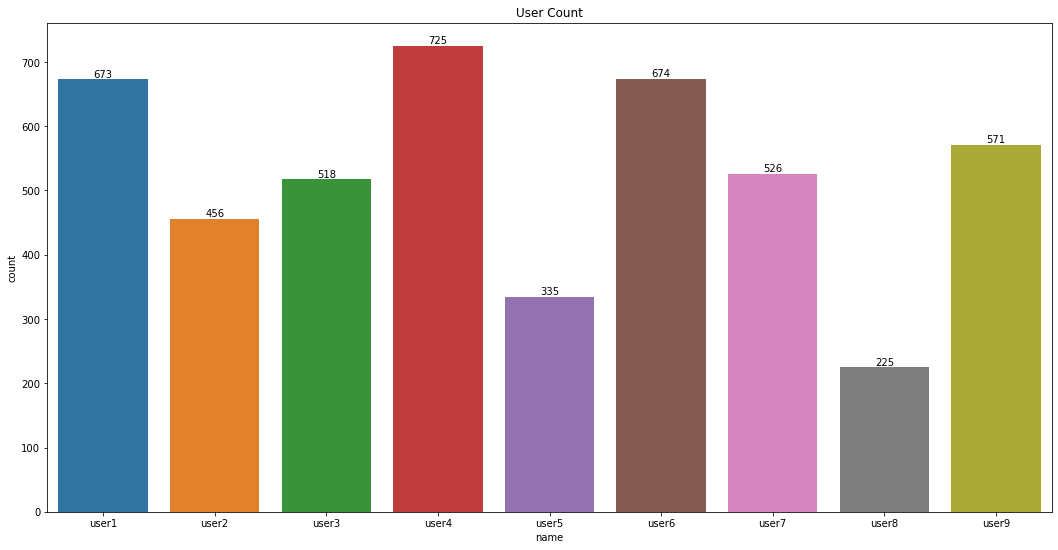

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='name', data=df)
ax.bar_label(ax.containers[0])
plt.title("User Count")
plt.show()
plt.clf()

In [41]:
print('The minimum usage time is:')
print(df.usage_time.min())
print('The maximum usage time is:')
print(df.usage_time.max())
print('The average usage time is:')
print(df.usage_time.mean())

The minimum usage time is:
2023-01-29 00:00:01
The maximum usage time is:
2023-01-29 22:00:07
The average usage time is:
2023-01-29 02:10:05.038486016


In [42]:
print('The minimum usage time is:')
print(df.start_time.min())
print('The maximum usage time is:')
print(df.start_time.max())
print('The average usage time is:')
print(df.start_time.mean())

The minimum usage time is:
2022-05-09 22:52:41
The maximum usage time is:
2022-11-05 18:41:14
The average usage time is:
2022-08-08 09:35:44.875185920


In [43]:
print('The minimum usage time per user:')
usage_time_minimum = df.groupby('name').usage_time.min()
usage_time_minimum

The minimum usage time per user:


name
user1   2023-01-29 00:00:18
user2   2023-01-29 00:00:08
user3   2023-01-29 00:00:01
user4   2023-01-29 00:00:45
user5   2023-01-29 00:01:07
user6   2023-01-29 00:00:18
user7   2023-01-29 00:00:20
user8   2023-01-29 00:00:20
user9   2023-01-29 00:00:09
Name: usage_time, dtype: datetime64[ns]

In [45]:
print('The maximum usage time per user:')
usage_time_maximum = df.groupby('name').usage_time.max()
usage_time_maximum

The maximum usage time per user:


name
user1   2023-01-29 19:35:11
user2   2023-01-29 20:39:52
user3   2023-01-29 17:01:28
user4   2023-01-29 18:11:43
user5   2023-01-29 06:36:11
user6   2023-01-29 19:35:11
user7   2023-01-29 22:00:07
user8   2023-01-29 17:24:26
user9   2023-01-29 19:26:09
Name: usage_time, dtype: datetime64[ns]

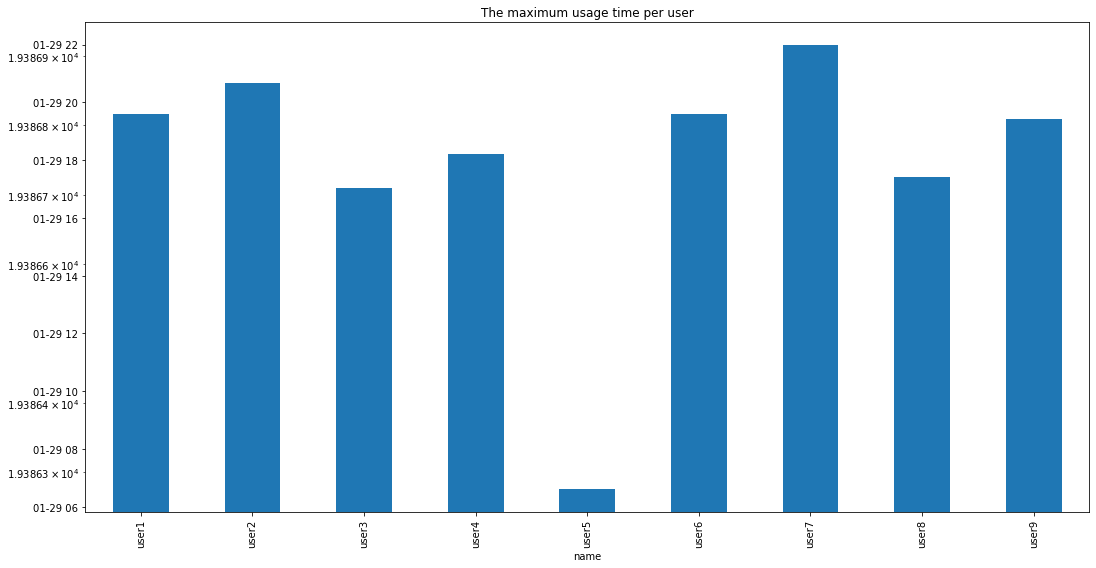

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(18, 9))
usage_time_maximum.plot(kind='bar', logy=True)
plt.title("The maximum usage time per user")
plt.show()
plt.clf()

In [48]:
df.IP.value_counts()

10.55.0.89      80
10.55.14.148    64
10.55.15.221    55
10.55.1.50      48
10.55.10.46     44
                ..
10.55.15.44      1
10.55.15.237     1
10.55.14.166     1
10.55.3.200      1
10.55.4.159      1
Name: IP, Length: 1299, dtype: int64

In [49]:
df.device.value_counts()

device1206    194
device835     137
device11      137
device1212    132
device312     113
             ... 
device582       1
device583       1
device584       1
device585       1
device613       1
Name: device, Length: 1224, dtype: int64

In [50]:
print('The minimum upload is: ' + str(df.upload.min()) + 'Kb')
print('The maximum upload is: ' + str(df.upload.max()) + 'Kb')
print('The average upload is: ' + str(round(df.upload.mean(), 2)) + 'Kb')

The minimum upload is: 2.0Kb
The maximum upload is: 2841640.0Kb
The average upload is: 33787.02Kb


In [51]:
print('The minimum upload per user:')
df.groupby('name').upload.min()

The minimum upload per user:


name
user1     19.0
user2     23.0
user3     36.0
user4     56.0
user5    382.0
user6     19.0
user7      2.0
user8      4.0
user9     41.0
Name: upload, dtype: float64

In [52]:
print('The maximum upload per user:')
df.groupby('name').upload.max()

The maximum upload per user:


name
user1     638566.0
user2     379955.0
user3    1625292.0
user4     754462.0
user5    2841640.0
user6     638566.0
user7     653731.0
user8     709058.0
user9    1352663.0
Name: upload, dtype: float64

In [53]:
print('The average upload per user:')
round(df.groupby('name').upload.mean(), 2)

The average upload per user:


name
user1    27291.34
user2    29188.79
user3    29594.88
user4    33783.74
user5    64500.35
user6    27700.73
user7    23075.54
user8    59190.12
user9    37944.66
Name: upload, dtype: float64

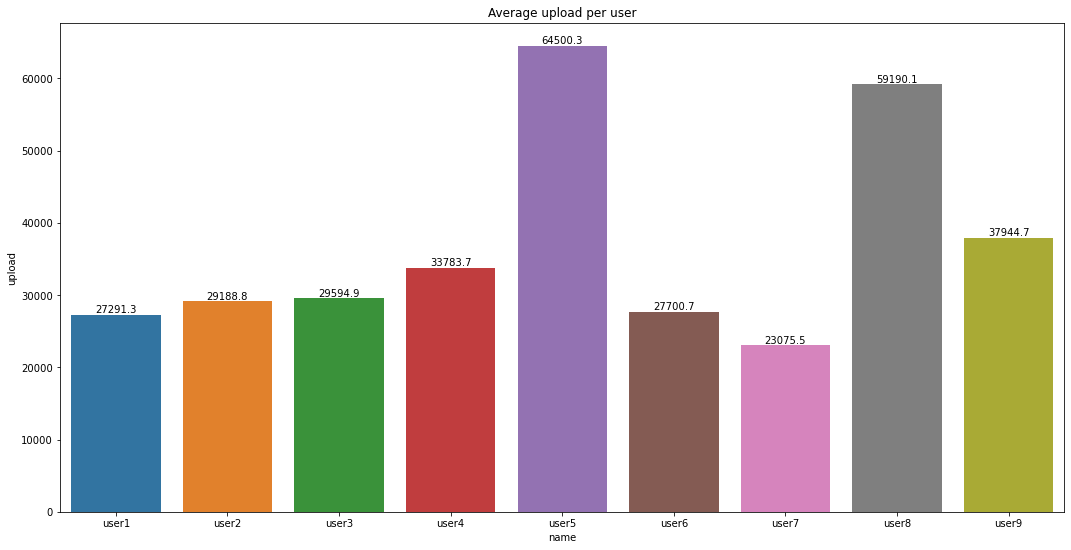

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='upload' , data=df, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average upload per user")
plt.show()
plt.clf()

In [55]:
print('The minimum download is: ' + str(df.download.min()) + 'Kb')
print('The maximum download is: ' + str(df.download.max()) + 'Kb')
print('The average download is: ' + str(round(df.download.mean(), 2)) + 'Kb')

The minimum download is: 9.0Kb
The maximum download is: 27902607.0Kb
The average download is: 396664.52Kb


In [56]:
print('The maximum download per user:')
df.groupby('name').download.max()

The maximum download per user:


name
user1    23760732.0
user2    21831352.0
user3     3145728.0
user4     8325693.0
user5     5033164.0
user6    23760732.0
user7    27902607.0
user8     2747269.0
user9     6008340.0
Name: download, dtype: float64

In [57]:
print('The maximum download per user:')
df.groupby('name').download.min()

The maximum download per user:


name
user1     50.0
user2     49.0
user3     60.0
user4     12.0
user5    461.0
user6     50.0
user7      9.0
user8     13.0
user9     61.0
Name: download, dtype: float64

In [58]:
print('The average download per user:')
df.groupby('name').download.mean()

The average download per user:


name
user1    270725.964339
user2    573798.015351
user3    342230.372587
user4    408580.259310
user5    357278.077612
user6    270545.182493
user7    453828.606464
user8    341417.124444
user9    578981.506130
Name: download, dtype: float64

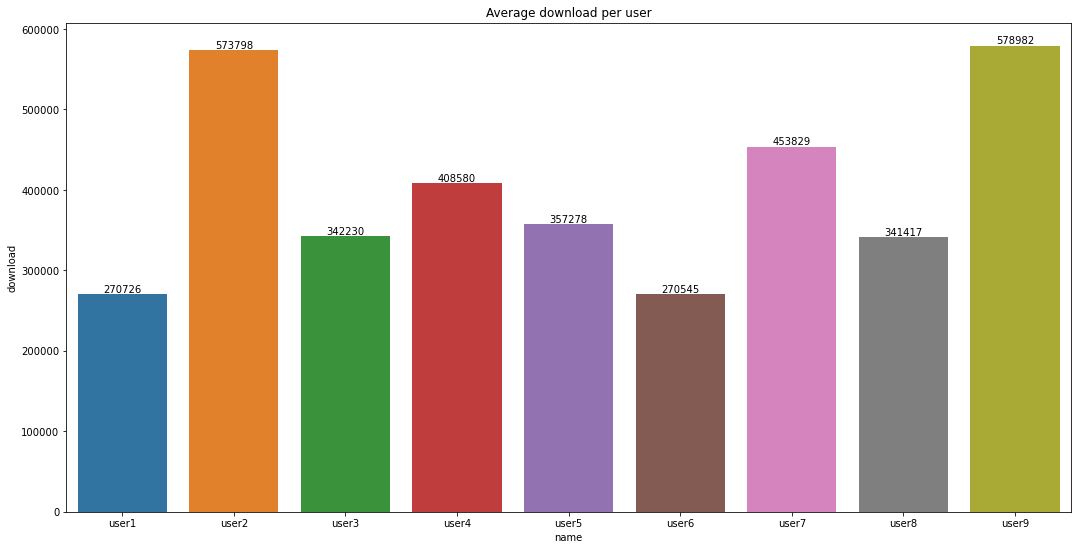

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='download' , data=df, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average download per user")
plt.show()
plt.clf()

In [60]:
print('The min total_transfer per user:')
df.groupby('name').total_transfer.min()

The min total_transfer per user:


name
user1     75.34
user2     73.13
user3      1.12
user4     13.45
user5    924.40
user6     75.34
user7     15.25
user8     18.08
user9    102.64
Name: total_transfer, dtype: float64

In [61]:
print('The max total_transfer per user:')
df.groupby('name').total_transfer.max()

The max total_transfer per user:


name
user1    24389877.76
user2    22051553.28
user3     3282042.88
user4     8524922.88
user5     5158993.92
user6    24389877.76
user7    28552724.48
user8     3166699.52
user9     6155141.12
Name: total_transfer, dtype: float64

In [62]:
print('The max total_transfer per user:')
df.groupby('name').total_transfer.mean()

The max total_transfer per user:


name
user1    297971.207325
user2    602904.187522
user3    371826.530058
user4    442413.511366
user5    421772.036537
user6    298199.879125
user7    476923.035437
user8    400682.276000
user9    616875.573800
Name: total_transfer, dtype: float64

In [69]:
df['seession_break_reason'].value_counts()

Idle-Timeout    4350
Lost-Carrier     162
Lost-Service     124
User-Request      65
NAS-Reboot         2
Name: seession_break_reason, dtype: int64

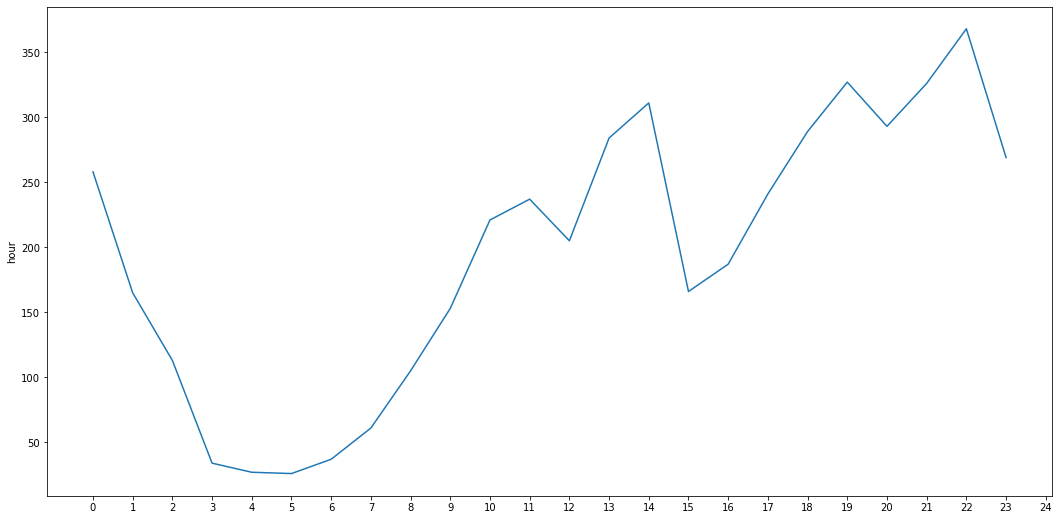

<Figure size 432x288 with 0 Axes>

In [92]:
df['hour'] = pd.to_datetime(df['start_time']).dt.hour
frequent_activity_time_of_day = df['hour'].value_counts().sort_index()
plt.figure(figsize=(18, 9))
sns.lineplot(data=frequent_activity_time_of_day)
plt.xticks(np.linspace(start=0, stop=24, num=25))
plt.show()
plt.clf()

In [76]:
base_ip = '10.55.14.222'
ip_count = 0
for i in range(1, df.shape[0]):
    if df.iloc[i]['IP'] != base_ip:
        ip_count +=1
        base_ip = df.iloc[i]['IP']

print('The IP Adress changed ' + str(ip_count) + ' times') 

The IP Adress changed 2303 times


In [75]:
df.shape

(4703, 11)

In [81]:
base_device = 'device1'
device_count = 0
for i in range(1, df.shape[0]):
    if df.iloc[i]['device'] != base_device:
        device_count +=1
        base_device = df.iloc[i]['device']

print('The device changed ' + str(device_count) + ' times') 

The device changed 1223 times


In [83]:
df.reset_index(inplace=True)

df['day'] = df['start_time'].dt.day
df['month'] = df['start_time'].dt.month

hourly_average = df.groupby('hour').total_transfer.mean()
print('The Average usage per hour is:\n ' +  str(round(hourly_average, 2)))

The Average usage per hour is:
 hour
0     464530.44
1     530880.86
2     431576.11
3     345303.34
4     359809.44
5     275960.91
6     468959.59
7     292886.83
8     366681.92
9     377480.64
10    393259.12
11    309492.45
12    310137.98
13    335270.58
14    472403.71
15    517005.11
16    403919.40
17    525423.69
18    666590.76
19    389841.79
20    355862.80
21    474038.34
22    449600.50
23    407785.08
Name: total_transfer, dtype: float64


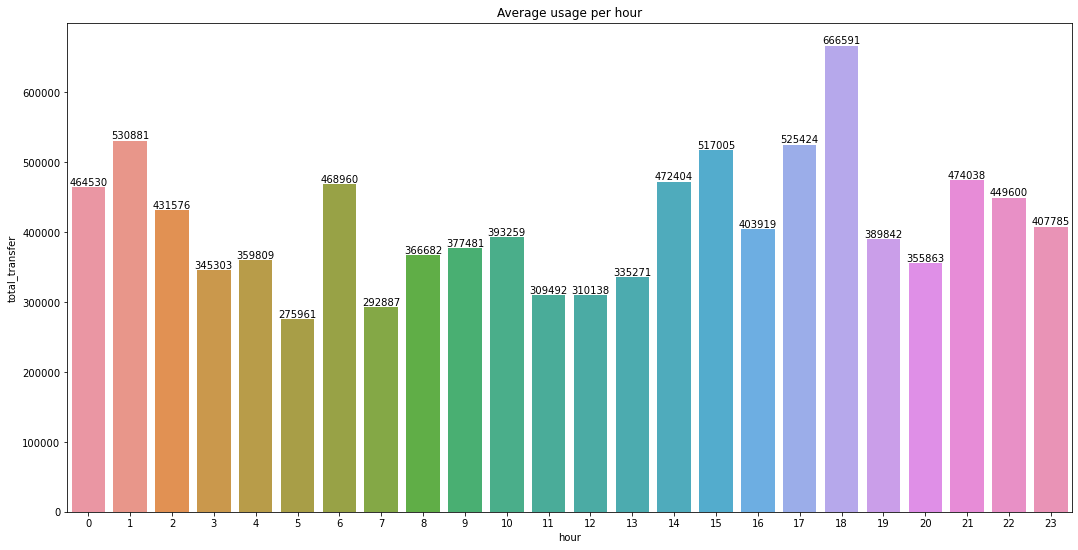

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='hour', y='total_transfer' , data=df, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average usage per hour")
plt.show()
plt.clf()

In [86]:
df.reset_index(inplace=True)



daily_average = df.groupby('day').total_transfer.mean()
print('The Average usage per day is:\n ' +  str(round(daily_average, 2)))

The Average usage per day is:
 day
1     396705.04
2     494496.48
3     445865.63
4     676332.03
5     652195.66
6     396261.75
7     402259.89
8     301859.57
9     393521.97
10    350665.02
11    729857.65
12    346695.95
13    501906.70
14    352701.10
15    521520.51
16    426719.39
17    475795.71
18    337490.93
19    301941.32
20    365130.12
21    462211.69
22    486595.37
23    383153.93
24    320598.94
25    443689.47
26    463432.02
27    324318.12
28    494576.34
29    363645.61
30    361418.88
31    369118.01
Name: total_transfer, dtype: float64


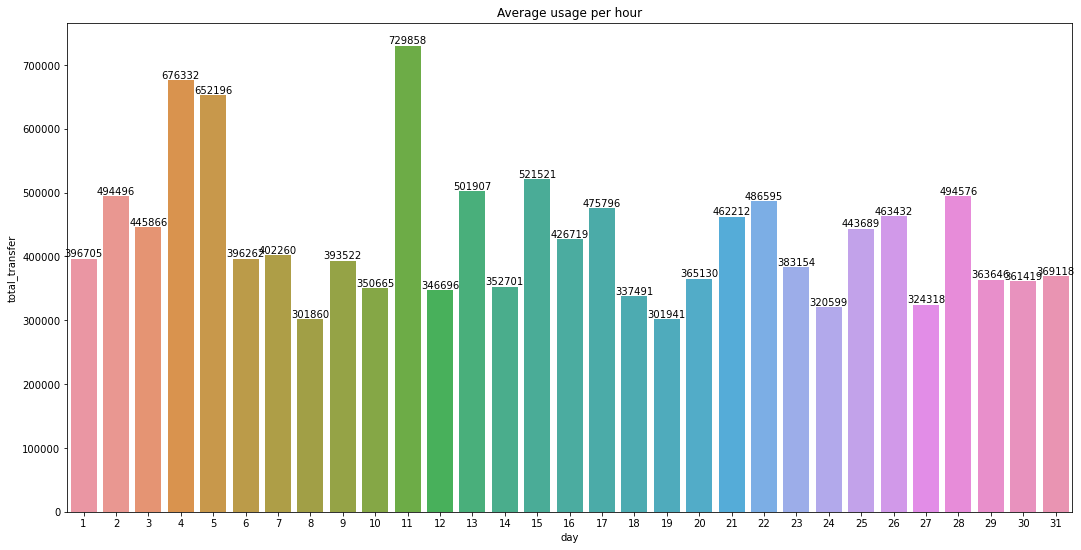

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='day', y='total_transfer' , data=df, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average usage per hour")
plt.show()
plt.clf()

In [89]:

monthly_average = df.groupby('month').total_transfer.mean()
print('The Average usage per day is:\n ' +  str(round(monthly_average, 2)))

The Average usage per day is:
 month
5     311177.16
6     338418.08
7     418583.99
8     479042.44
9     482955.52
10    549467.63
11    399804.11
Name: total_transfer, dtype: float64


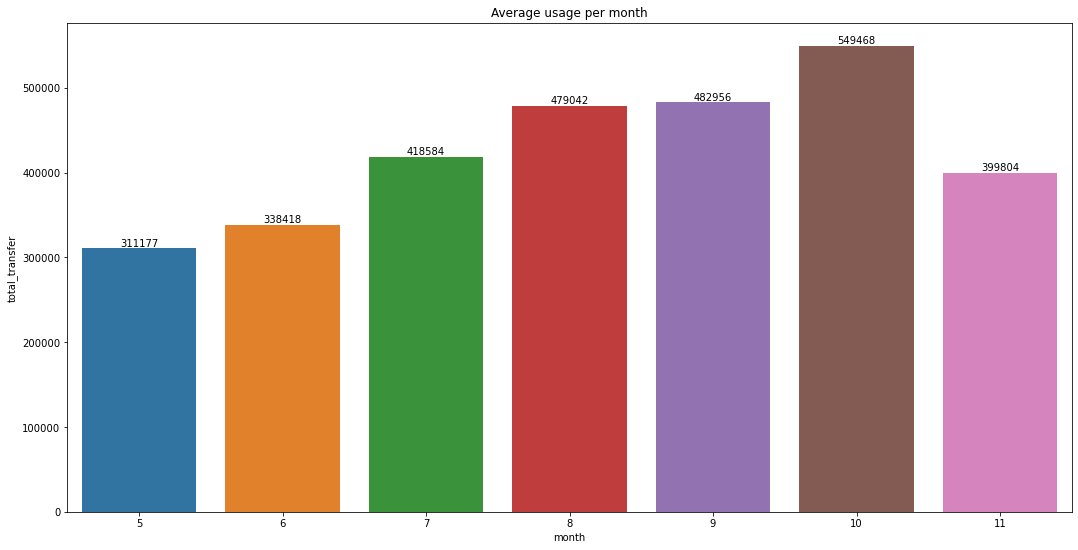

<Figure size 432x288 with 0 Axes>

In [90]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='month', y='total_transfer' , data=df, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average usage per month")
plt.show()
plt.clf()